In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('fashion_data/fashion-mnist_train.csv')
data_test = pd.read_csv('fashion_data/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

ModuleNotFoundError: No module named 'keras'

In [2]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [5]:
cnn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [6]:
history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 48s 1ms/step - loss: 0.9118 - accuracy: 0.6564 - val_loss: 0.5545 - val_accuracy: 0.7811
Epoch 2/25
48000/48000 [==============================] - 48s 1ms/step - loss: 0.5502 - accuracy: 0.7934 - val_loss: 0.4399 - val_accuracy: 0.8383
Epoch 3/25
48000/48000 [==============================] - 49s 1ms/step - loss: 0.4715 - accuracy: 0.8259 - val_loss: 0.4084 - val_accuracy: 0.8496
Epoch 4/25
48000/48000 [==============================] - 49s 1ms/step - loss: 0.4234 - accuracy: 0.8443 - val_loss: 0.3606 - val_accuracy: 0.8713
Epoch 5/25
48000/48000 [==============================] - 48s 993us/step - loss: 0.3919 - accuracy: 0.8569 - val_loss: 0.3408 - val_accuracy: 0.8762
Epoch 6/25
48000/48000 [==============================] - 46s 954us/step - loss: 0.3676 - accuracy: 0.8649 - val_loss: 0.3223 - val_accuracy: 0.8829
Epoch 7/25
48000

In [7]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.2086141019642353
Test accuracy: 0.9203000068664551


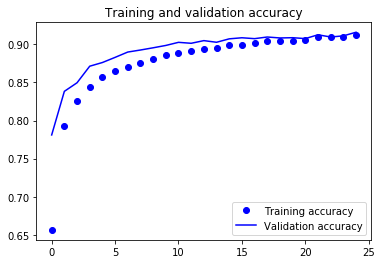

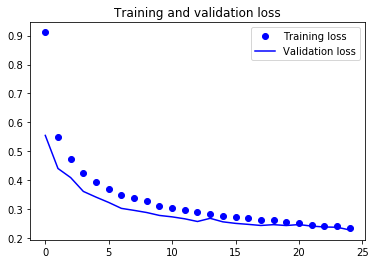

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [13]:
history3 = cnn3.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)


Epoch 1/50
187/187 [==============================] - 63s 336ms/step - loss: 0.2865 - accuracy: 0.8923 - val_loss: 0.2896 - val_accuracy: 0.9049
Epoch 2/50
187/187 [==============================] - 70s 375ms/step - loss: 0.2904 - accuracy: 0.8923 - val_loss: 0.2170 - val_accuracy: 0.9022
Epoch 3/50
187/187 [==============================] - 65s 346ms/step - loss: 0.2881 - accuracy: 0.8930 - val_loss: 0.2412 - val_accuracy: 0.9022
Epoch 4/50
187/187 [==============================] - 66s 351ms/step - loss: 0.2909 - accuracy: 0.8919 - val_loss: 0.2890 - val_accuracy: 0.9014
Epoch 5/50
187/187 [==============================] - 384s 2s/step - loss: 0.2929 - accuracy: 0.8902 - val_loss: 0.1475 - val_accuracy: 0.9093
Epoch 6/50
187/187 [==============================] - 68s 363ms/step - loss: 0.2871 - accuracy: 0.8924 - val_loss: 0.2713 - val_accuracy: 0.9089
Epoch 7/50
187/187 [==============================] - 66s 354ms/step - loss: 0.2852 - accuracy: 0.8934 - val_loss: 0.2109 - val_accu

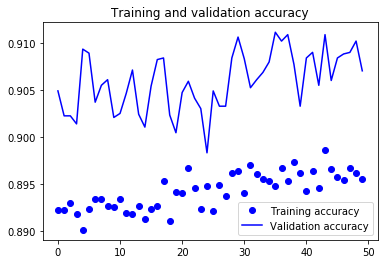

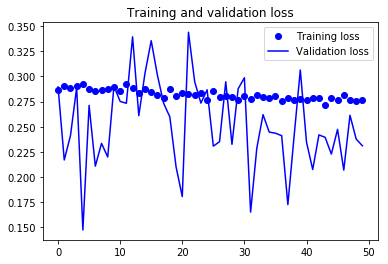

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()